In [1]:
#Import Requirment Library
import pandas as pd
from datetime import date
from datetime import datetime
import matplotlib.pylab as plt

In [2]:
#Read All Data
dataframes=[]
for day in range(1, 6):
    df = pd.read_csv("Day{}_Trades_SPY.csv".format(day))
    dataframes.append(df)

In [3]:
#Add Day Into to dataframes
for day in range(5):
    dataframes[day]["Day"]=[day+1]*len(dataframes[day])

In [4]:
#Put Days Together
for day in range(1,5):
    dataframes[0]=pd.concat([dataframes[0], dataframes[day]])

In [5]:
df=dataframes[0]

In [6]:
# Eliminate nanoseconds and convert 'Time' column to datetime format
df['Time'] = pd.to_datetime(df['Time']).dt.floor('ns')

In [7]:
# Convert 'PARTICIPANT_TIME' column to datetime format
df['PARTICIPANT_TIME'] = pd.to_datetime(df['PARTICIPANT_TIME']).dt.floor('ns')

In [8]:
df.dtypes

Time                datetime64[ns]
PRICE                      float64
SIZE                         int64
EXCHANGE                    object
PARTICIPANT_TIME    datetime64[ns]
Day                          int64
dtype: object

In [9]:
df.head()

,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Day
0,2023-12-11 09:30:00.000744,455.69,100,Z,2023-12-11 09:30:00.000467,1
1,2023-12-11 09:30:00.000838,455.20,100,K,2023-12-11 09:30:00.000457,1
2,2023-12-11 09:30:00.001118,455.86,63,Z,2023-12-11 09:30:00.000887,1
3,2023-12-11 09:30:00.001128,455.17,105,Z,2023-12-11 09:30:00.000887,1
4,2023-12-11 09:30:00.001228,455.45,61,K,2023-12-11 09:30:00.000935,1


In [10]:
# Reset the DataFrame index
df = df.reset_index()
df

,index,Time,PRICE,SIZE,EXCHANGE,PARTICIPANT_TIME,Day
0,0,2023-12-11 09:30:00.000744,455.69,100,Z,2023-12-11 09:30:00.000467,1
1,1,2023-12-11 09:30:00.000838,455.20,100,K,2023-12-11 09:30:00.000457,1
2,2,2023-12-11 09:30:00.001118,455.86,63,Z,2023-12-11 09:30:00.000887,1
3,3,2023-12-11 09:30:00.001128,455.17,105,Z,2023-12-11 09:30:00.000887,1
4,4,2023-12-11 09:30:00.001228,455.45,61,K,2023-12-11 09:30:00.000935,1
...,...,...,...,...,...,...,...
3962291,231399,2023-12-11 16:00:00.306369,442.59,19,T,2023-12-11 16:00:00.306017,5
3962292,231400,2023-12-11 16:00:00.332998,442.34,81,T,2023-12-11 16:00:00.332643,5
3962293,231401,2023-12-11 16:00:00.567277,442.24,400,T,2023-12-11 16:00:00.566928,5
3962294,231402,2023-12-11 16:00:00.567277,442.30,119,T,2023-12-11 16:00:00.566928,5


In [11]:
# Group by 'EXCHANGE' and describe the 'PRICE' column
pd.set_option('display.max_rows', None)
df.groupby(['Day'])['PRICE'].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
1,342068.0,457.230434,0.627741,455.01,456.85,457.30,457.68,458.84
2,314071.0,264.302808,0.507244,263.14,263.90,264.27,264.67,267.26
3,270851.0,266.171165,0.411743,264.80,265.93,266.19,266.44,267.37
4,2803902.0,236.866016,4.192842,227.81,233.24,237.41,240.05,248.49
5,231404.0,442.078810,0.392062,440.88,441.80,442.08,442.36,443.22


In [12]:
df.groupby(['Day'])['SIZE'].describe()

,count,mean,std,min,25%,50%,75%,max
Day,,,,,,,,
1,342068.0,111.335492,2343.927704,1.0,20.0,100.0,100.0,1347466.0
2,314071.0,220.145604,2652.188500,1.0,100.0,100.0,200.0,1439916.0
3,270851.0,220.516166,3359.572103,1.0,100.0,100.0,200.0,1714626.0
4,2803902.0,96.937193,1385.585519,1.0,14.0,85.0,100.0,2094942.0
5,231404.0,119.967097,2169.778142,1.0,20.0,100.0,100.0,1027179.0


In [13]:
times = pd.to_datetime(df.Time)
df['Hour']=times.dt.hour
df['Minute']=times.dt.minute

In [14]:
df['TimeWithInfo']=df['Day']*10000+df['Hour']*100+df['Minute']
df['TimeWithInfo'].head()

0    10930
1    10930
2    10930
3    10930
4    10930
Name: TimeWithInfo, dtype: int64

In [15]:
# Create a DataFrame to store open, low, high, close, volume, and count for each exchange and hour
OpenCloseTablePerHour = {}
Index=df.TimeWithInfo.unique()
OpenCloseTablePerHour["Open"] = []
OpenCloseTablePerHour["Low"] = []
OpenCloseTablePerHour["High"] = []
OpenCloseTablePerHour["Close"] = []
OpenCloseTablePerHour["Volume"] = []
OpenCloseTablePerHour["Count"] = []
IndexForPandas=[]

# Populate the DataFrame with values for each exchange and hour

for j in Index:
    Open = 0
    Low = 0
    High = 0
    Close = 0
    Volume = 0
    Count = 0

    try:
        Open = df[(df['TimeWithInfo'] == j)]['PRICE'].iloc[0]
    except IndexError:
        Open = 0

    OpenCloseTablePerHour["Open"].append(Open)

    try:
        Low = df[(df['TimeWithInfo'] == j)]['PRICE'].min()
    except ValueError:
         Low = 0

    OpenCloseTablePerHour["Low"].append(Low)

    try:
        High = df[(df['TimeWithInfo'] == j)]['PRICE'].max()
    except ValueError:
        High = 0

    OpenCloseTablePerHour["High"].append(High)

    try:
        Close = df[(df['TimeWithInfo'] == j)]['PRICE'].iloc[-1]
    except IndexError:
        Close = 0

    OpenCloseTablePerHour["Close"].append(Close)

    try:
        Volume = df[(df['TimeWithInfo'] == j)]['SIZE'].sum()
    except ValueError:
        Volume = 0

    OpenCloseTablePerHour["Volume"].append(Volume)

    try:
        Count = df[(df['TimeWithInfo'] == j)]['PRICE'].count()
    except ValueError:
        Count = 0

    OpenCloseTablePerHour["Count"].append(Count)
    IndexForPandas.append(j)


In [16]:
OpenCloseTablePerMinute = pd.DataFrame(OpenCloseTablePerHour,index=IndexForPandas)
OpenCloseTablePerMinute[(OpenCloseTablePerMinute.index > 40000) & (OpenCloseTablePerMinute.index <50000)]

,Open,Low,High,Close,Volume,Count
40930,236.28,236.01,239.23,238.05,2415972,12993
40931,238.10,236.03,240.68,239.79,1620751,12169
40932,239.93,238.67,240.52,239.93,1477235,11760
40933,239.58,239.44,243.54,241.70,1387699,11952
40934,241.67,239.99,242.36,240.56,1051070,11460
40935,240.53,236.08,241.12,239.28,1281949,12383
40936,239.65,236.02,239.88,239.35,999409,10834
40937,239.23,238.48,240.51,238.89,1177472,10038
40938,239.13,236.37,239.76,239.60,991958,8507
40939,239.54,238.64,239.89,239.28,788732,8121


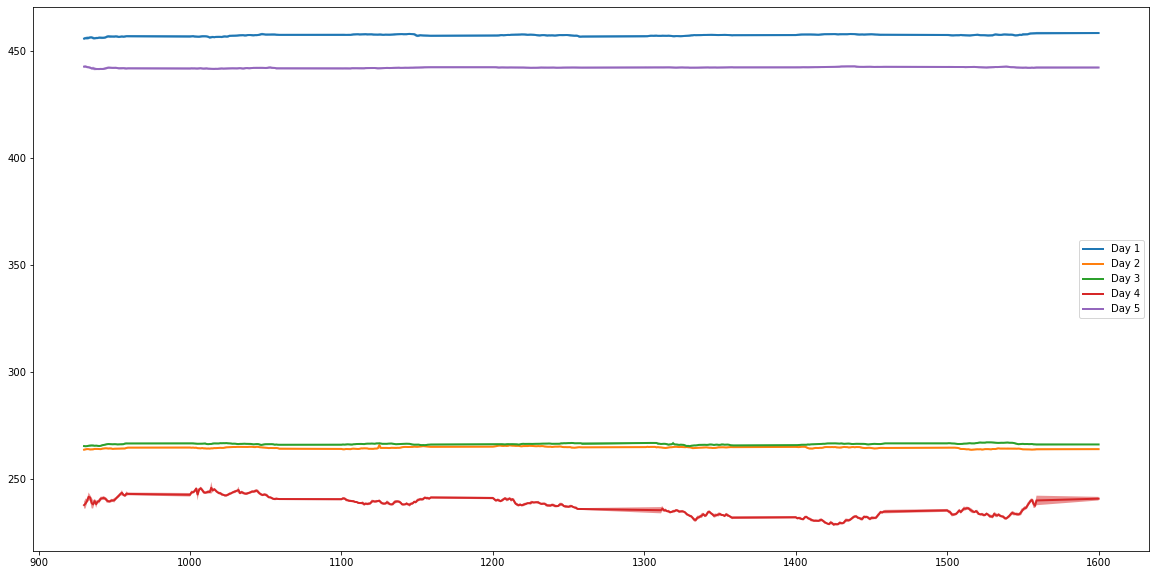

In [18]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in range(1,6):
    plotedFrame = OpenCloseTablePerMinute[(OpenCloseTablePerMinute.index>currency*10000) & (OpenCloseTablePerMinute.index<(currency+1)*10000)]
    x=plotedFrame.index%10000
    
    yDown=plotedFrame['Low']
    yUp=plotedFrame['High']
    ax.fill_between(x, yDown, yUp, alpha=.5, linewidth=0)
    ax.plot(x, (yDown + yUp)/2, linewidth=2, label='Day '+str(currency))
plt.legend()
plt.show()

<AxesSubplot:xlabel='TimeWithInfo'>

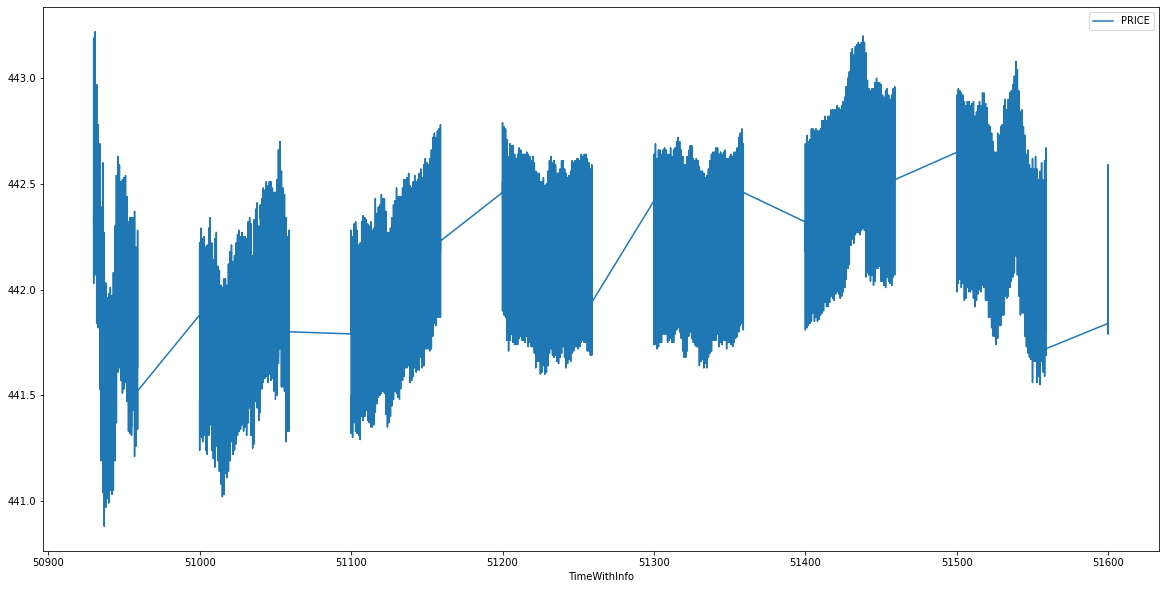

In [19]:
df[(df['Day']==5)].plot(x='TimeWithInfo',y='PRICE',figsize=(20,10))

<AxesSubplot:xlabel='TimeWithInfo'>

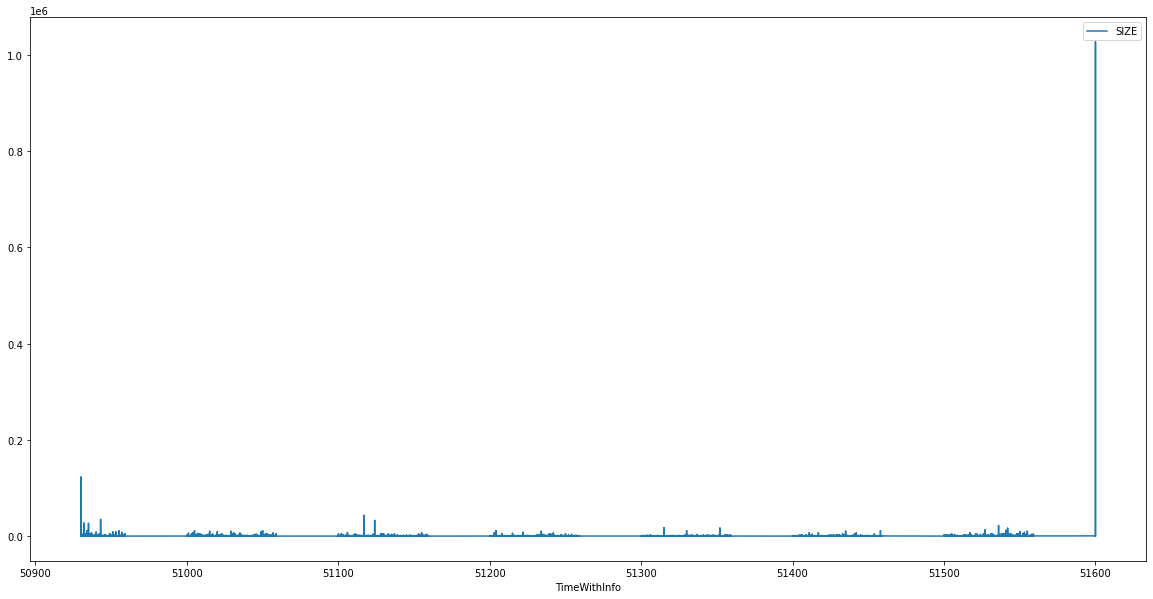

In [20]:
df[(df['Day']==5)].plot(x='TimeWithInfo',y='SIZE',figsize=(20,10))

In [21]:
HeatMaps1=[]
for k in range(1,6):
    DensityMap=df[(df['Day']==k)].groupby(["Hour","Minute"]).count()['index']
    IndexCol=[]
    IndexRow=[]
    for i in DensityMap.index:
        IndexCol.append(i[0])
        IndexRow.append(i[1])
    IndexCol=set(IndexCol)
    IndexRow=set(IndexRow)

    HeatMap=[[0 for _ in range(len(IndexRow))] for _ in range(len(IndexCol))]
    for index,i in enumerate(DensityMap.index):
        HeatMap[i[0]-min(IndexCol)][i[1]-min(IndexRow)]=DensityMap.iloc[index]
    HeatMaps1.append(HeatMap)

In [22]:
for index,HeatMap in enumerate(HeatMaps1):
    HeatMaps1[index] = pd.DataFrame(HeatMap)

In [23]:
for index,HeatMap in enumerate(HeatMaps1):
    HeatMaps1[index].index=[i+9 for i in HeatMap.index]

In [24]:
HeatMaps1[2].T.style.background_gradient(cmap='coolwarm')

,9,10,11,12,13,14,15,16
0,0,985,637,587,620,529,637,11
1,0,1466,511,412,223,420,488,0
2,0,824,347,220,535,219,541,0
3,0,936,625,254,372,726,397,0
4,0,1027,386,180,237,435,475,0
5,0,604,476,152,218,350,502,0
6,0,504,499,298,430,391,543,0
7,0,506,465,215,366,292,603,0
8,0,609,408,242,417,653,598,0
9,0,371,581,338,4047,530,539,0


In [25]:
HeatMaps2=[]
for k in range(1,6):
    DensityMap=df[(df['Day']==k)].groupby(["Hour","Minute"])['SIZE'].sum()
    IndexCol=[]
    IndexRow=[]
    for i in DensityMap.index:
        IndexCol.append(i[0])
        IndexRow.append(i[1])
    IndexCol=set(IndexCol)
    IndexRow=set(IndexRow)

    HeatMap=[[0 for _ in range(len(IndexRow))] for _ in range(len(IndexCol))]
    for index,i in enumerate(DensityMap.index):
        HeatMap[i[0]-min(IndexCol)][i[1]-min(IndexRow)]=DensityMap.iloc[index]
    HeatMaps2.append(HeatMap)

In [26]:
for index,HeatMap in enumerate(HeatMaps2):
    HeatMaps2[index] = pd.DataFrame(HeatMap)

In [27]:
for index,HeatMap in enumerate(HeatMaps2):
    HeatMaps2[index].index=[i+9 for i in HeatMap.index]

In [28]:
HeatMaps2[2].T.style.background_gradient(cmap='coolwarm')

,9,10,11,12,13,14,15,16
0,0,206064,99655,120914,135638,100742,156492,1750691
1,0,295564,77918,132924,29530,84935,85764,0
2,0,194014,79149,31137,89008,47228,97030,0
3,0,238814,130391,40501,127562,112357,65879,0
4,0,180444,58434,29881,36100,135925,53640,0
5,0,105035,68679,25685,30235,82109,87602,0
6,0,87465,66984,38914,68994,112546,91403,0
7,0,105923,101443,35343,55989,55475,136434,0
8,0,129768,62296,46584,74643,139972,128010,0
9,0,77204,112993,85445,819120,82534,107179,0


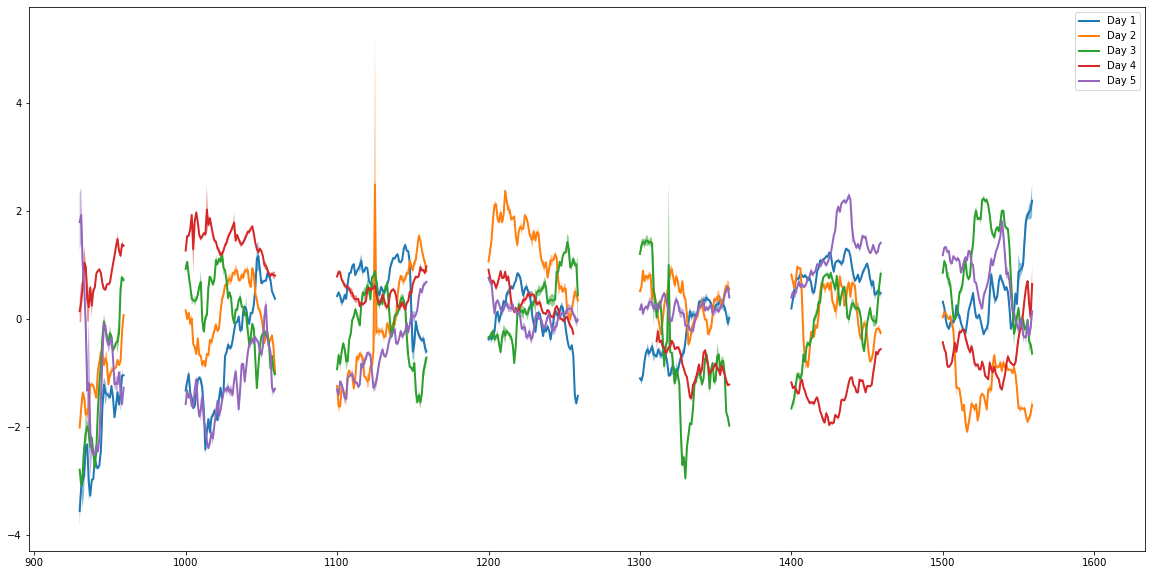

In [30]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in range(1,6):
    plotedFrame = OpenCloseTablePerMinute[(OpenCloseTablePerMinute.index>currency*10000) & (OpenCloseTablePerMinute.index<(currency+1)*10000)]
    plotedFrame.index=plotedFrame.index%10000
    normalizedFrame=(plotedFrame[['Open','Low','High','Close']] -plotedFrame[['Open','Low','High','Close']].mean())/plotedFrame[['Open','Low','High','Close']].std()
    new_x = pd.DataFrame({"Time":range(900,1620), 'Low':0,'High':0}).set_index("Time")
    new_x["Low"]=normalizedFrame['Low']
    new_x["High"]=normalizedFrame['High']
    yDown=new_x["Low"]
    yUp=new_x["High"]
    ax.fill_between(new_x.index, yDown, yUp, alpha=.5, linewidth=0)
    ax.plot(new_x.index, (yDown + yUp)/2, linewidth=2, label='Day '+str(currency))
plt.legend()
plt.show()

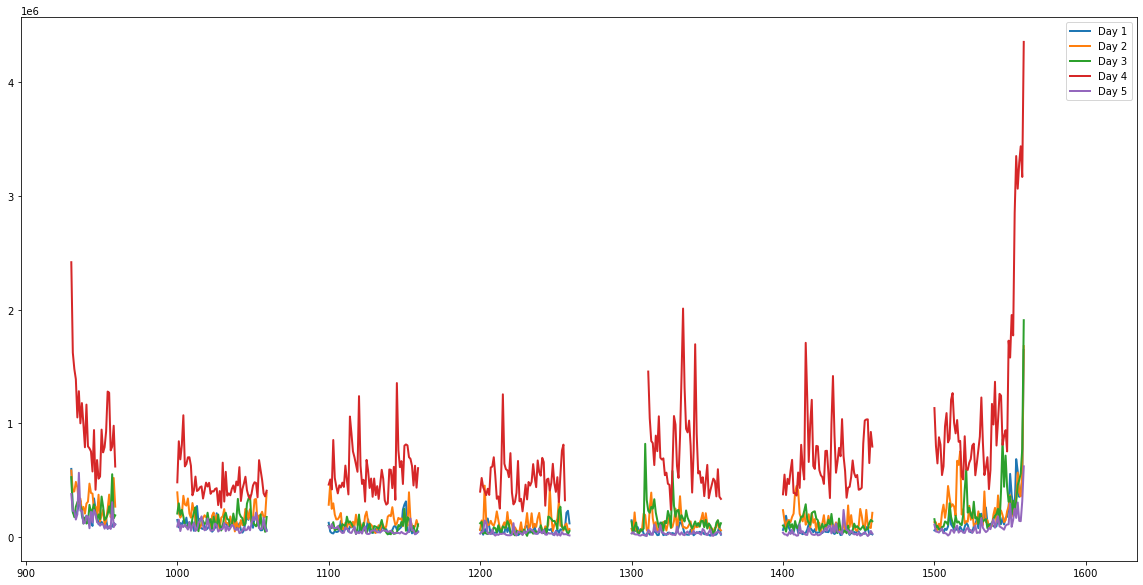

In [31]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in range(1,6):
    plotedFrame = OpenCloseTablePerMinute[(OpenCloseTablePerMinute.index>currency*10000) & (OpenCloseTablePerMinute.index<(currency+1)*10000)]
    plotedFrame.index=plotedFrame.index%10000
    normalizedFrame=plotedFrame['Volume']
    new_x = pd.DataFrame({"Time":range(900,1620), "Volume": 0}).set_index("Time")
    new_x["Volume"]=normalizedFrame
    #new_x.fillna(0, inplace=True)
    
    #yUp=normalizedFrame['High']
    #ax.fill_between(x, yDown, yUp, alpha=.5, linewidth=0)
    ax.plot(new_x.index, new_x['Volume'], linewidth=2, label='Day '+str(currency))
plt.legend()
plt.show()

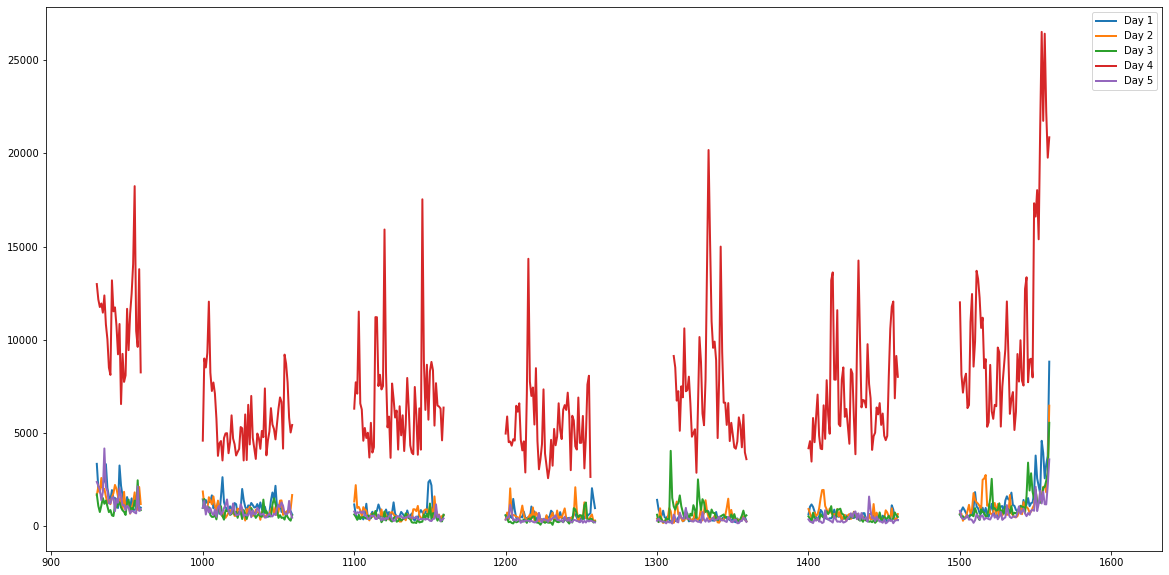

In [32]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in range(1,6):
    plotedFrame = OpenCloseTablePerMinute[(OpenCloseTablePerMinute.index>currency*10000) & (OpenCloseTablePerMinute.index<(currency+1)*10000)]
    plotedFrame.index=plotedFrame.index%10000
    normalizedFrame=plotedFrame['Count']
    new_x = pd.DataFrame({"Time":range(900,1620), "Count": 0}).set_index("Time")
    new_x["Count"]=normalizedFrame
    #new_x.fillna(0, inplace=True)
    
    #yUp=normalizedFrame['High']
    #ax.fill_between(x, yDown, yUp, alpha=.5, linewidth=0)
    ax.plot(new_x.index, new_x['Count'], linewidth=2, label='Day '+str(currency))
plt.legend()
plt.show()

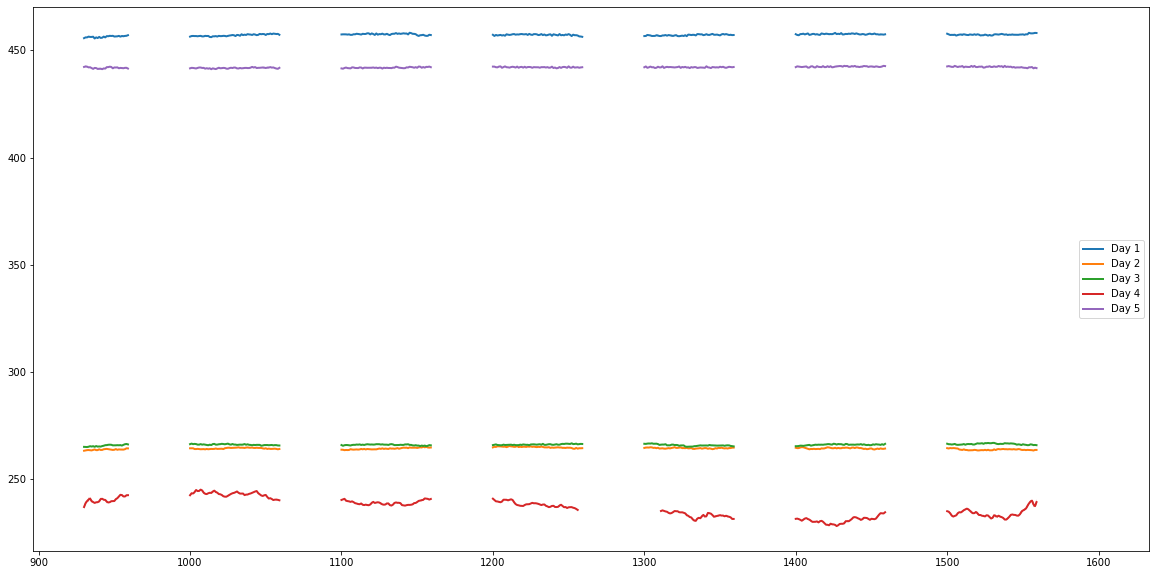

In [33]:
# plot
fig, ax = plt.subplots(figsize=(20, 10))
for currency in range(1,6):
    plotedFrame = OpenCloseTablePerMinute[(OpenCloseTablePerMinute.index>currency*10000) & (OpenCloseTablePerMinute.index<(currency+1)*10000)]
    plotedFrame.index=plotedFrame.index%10000
    normalizedFrame=plotedFrame[['Open','Low','High','Close']]
    new_x = pd.DataFrame({"Time":range(900,1620), 'Low':0,'High':0}).set_index("Time")
    new_x["Low"]=normalizedFrame['Open']
    new_x["High"]=normalizedFrame['Close']
    yDown=new_x["Low"]
    yUp=new_x["High"]
    ax.fill_between(new_x.index, yDown, yUp, alpha=.5, linewidth=0)
    ax.plot(new_x.index, (yDown + yUp)/2, linewidth=2, label='Day '+str(currency))
plt.legend()
plt.show()